In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ind = np.arange(10)
A = np.random.randint(low=1, high=10, size=10)
B = np.random.randint(low=1, high=10, size=10)
# X = np.arange(1,11)
# Y = np.arange(1,11)
diff = [abs(a-b) for a,b in zip(A,B)]
display(A)
display(B)

array([5, 2, 7, 4, 1, 1, 1, 5, 4, 8])

array([4, 4, 1, 7, 8, 9, 8, 1, 6, 6])

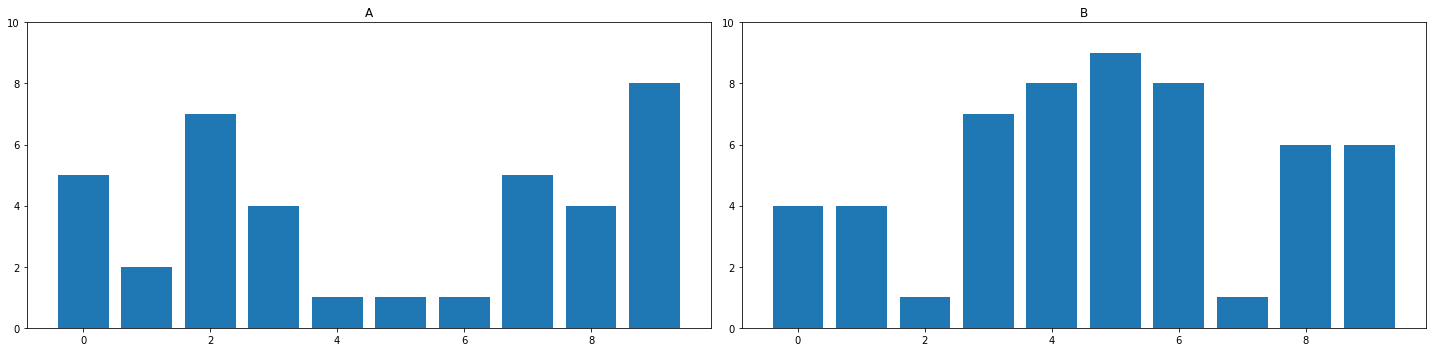

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.bar(ind, A)
plt.ylim(0,10)
plt.title('A')

plt.subplot(122)
plt.bar(ind, B)
plt.ylim(0,10)
plt.title('B')

plt.tight_layout()
plt.show()

### Earth Mover's Distance
When $A$ and $B$ are two one-dimensional arrays of bins, (*e.g.* histograms), the Earth Mover's Distance can be computed as:
1. $EMD_0 = 0$
2. $EMD_{i+1} = A_i + EMD_i - B_i$
3. $Total = \sum_{i=0}^{n} \left| EMD_i \right|$

In [6]:
# EMD
EMD = [A[0]-B[0]]
for i in range(1,len(A)):
    EMD.append(A[i]-B[i]+EMD[-1])
print(f'EMD(A,B) = {sum(map(abs,EMD))}')

EMD(A,B) = 97


In [7]:
EMD = [0]*(len(A)+1)
for i in range(len(A)):
    EMD[i] = A[i]-B[i]+EMD[i-1]
print(f'EMD(A,B) = {sum(map(abs,EMD))}')

EMD(A,B) = 97


Unwrapping the EMD algorithm:
* $EMD_n = A_{n-1} - B_{n-1} + EMD_{n-1}$
* $EMD_n = A_{n-1} - B_{n-1} + (A_{n-2} - B_{n-2} + EMD_{n-2})$
* $EMD_n = A_{n-1} - B_{n-1} + (A_{n-2} - B_{n-2} + (A_{n-3} - B_{n-3} + EMD_{n-3}))$
* $\dots$

Rearranging the factors:
* $EMD_n = (A_{n-1} + A_{n-2} + A_{n-3} + \cdots + A_0) - (B_{n-1} + B_{n-2} + B_{n-3} + \cdots + B_0)$
* $EMD_n = \sum_{j=0}^{n-1} A_j - \sum_{j=0}^{n-1} B_j$

If $A'$ and $B'$ are the cumulative sums of $A$ and $B$, respectively, the EMD can be computed as the $\ell_1$ norm of $A'$ and $B'$.

* $A' = \left\{ \sum_{j=0}^{i} A_j : 0 \le i \le n-1 \right\}$

* $Total = EMD_0 + \sum_{i=1}^{n} \left| \sum_{j=0}^{i-1} A_j - \sum_{j=0}^{i-1} B_j \right| = \sum_{i=1}^{n} \left| \sum_{j=0}^{i-1} A_j - \sum_{j=0}^{i-1} B_j \right| = \sum_{i=0}^{n-1} \left| A'_i - B'_i \right| = \lVert A'-B' \rVert_1 $

In [8]:
cA = np.cumsum(A)
cB = np.cumsum(B)
total = sum(abs(ca-cb) for ca,cb in zip(cA,cB))
print(f'EMD(A,B) = {total}')

EMD(A,B) = 97


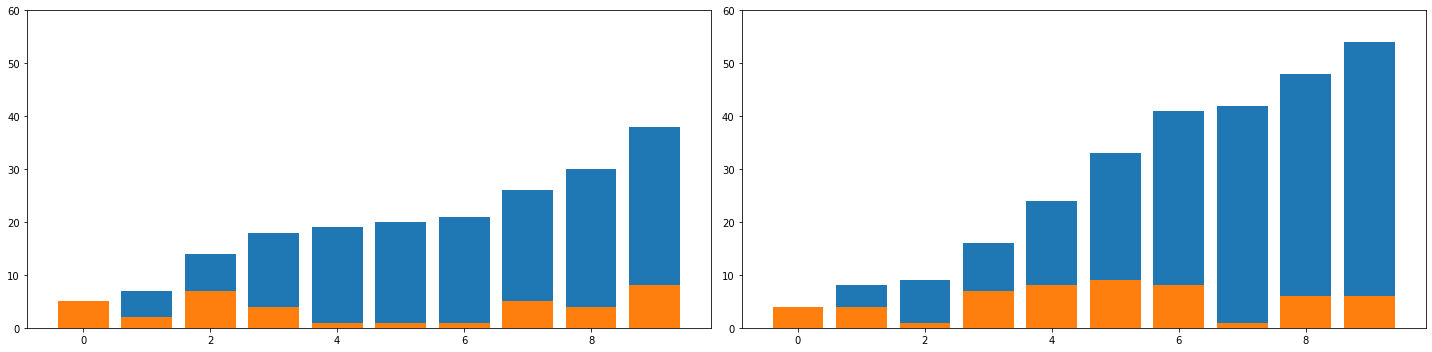

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.bar(ind, cA)
plt.bar(ind, A)
plt.ylim(0,60)

plt.subplot(122)
plt.bar(ind, cB)
plt.bar(ind, B)
plt.ylim(0,60)

plt.tight_layout()
plt.show()

### Private Set Intersection Cardinality

$C$ and $S$ are two parties. $C$ privately holds histogram $A = \{a_1, \dots, a_{|A|}\}$ and $S$ privately holds histogram $B = \{b_1, \dots, b_{|B|}\}$. $Enc$ is the Paillier cryptosystem, which is additively homomorphic and has the following properties:
1. $Enc(x) \cdot Enc(y) = Enc(x+y)$
2. $Enc(x)^k = Enc(kx)$

$C$ and $S$ can securely compute the cardinality of the intersection of $A$ and $B$ as follows:

1. $C$ computes $P(x) = \sum_{i=0}^{|A|} p_ix^i = \prod_{j=1}^{|A|} (x-a_i)$
2. $C$ sends $Enc(p_0), \dots, Enc(p_{|A|})$ to $S$.
3. $S$ picks a random element $r_j \in \mathbb{Z}_n$ for every $1 \le j \le |B|$. $S$ computes $Enc(r_j \cdot p(b_j) + m)$ for $1 \le j \le |B|$. Then $S$ sends these ciphertexts to $C$.
4. $C$ decrypts the received ciphertexts. The result of each decryption is $m$ or a random element.
5. The number of $m$ received equals $|A \cap B|$.

#### Compute the $\ell_1$ norm of two histograms

As shown above, the EMD can be computed as the $\ell_1$ norm of $A'$ and $B'$. Given sets $A$ and $B$, the $\ell_1$ norm is defined as follows:

$\ell_1(A, B) = \sum_{i=1}^{|A|} |a_i - b_i| = \sum_{i=1}^{|A|} max(a_i,b_i) - \sum_{i=1}^{|A|} min(a_i,b_i)$.

Next, we show how to securely compute the $\ell_1$ norm given two sets and a secure protocol to compute the cardinality of the intersections of two sets.

Given $A$ and $B$, define $X = \left\{(i,j) : a_i > 0 \text{ and } 1 \le j \le a_i \right\}$ and $Y = \left\{(i,j) : b_i > 0 \text{ and } 1 \le j \le b_i \right\}$.

Compute $|X \cap Y|$ as detailed in the protocol above.

$|X \cap Y| = \left| \left\{(i,j) : a_i > 0 \text{ and } b_i > 0 \text{ and } 1 \le j \le min(a_i,b_i) \right\} \right| = \sum_{i=1}^{|A|} min(a_i,b_i)$. 

$|X \cup Y| = \left| \left\{(i,j) : a_i > 0 \text{ and } b_i > 0 \text{ and } 1 \le j \le max(a_i,b_i) \right\} \right| = \sum_{i=1}^{|A|} max(a_i,b_i)$. 

Therefore, $\ell_1(A, B) = |X \cup Y| - |X \cap Y|$

By definition $|X \cup Y| = |X| + |Y| - |X \cap Y|$

$|X \cup Y| - |X \cap Y| = |X| + |Y| - 2|X \cap Y| = \sum_{i=1}^{|A|} max(a_i,b_i) - \sum_{i=1}^{|A|} min(a_i,b_i) = \sum_{i=1}^{|A|} |a_i - b_i| = norm_{\ell_1}(A,B)$

If $A'$ and $B'$ are the cumulative sums of two histograms $A$ and $B$, then the result of $norm_{\ell_1}(A',B')$ is the EMD of $A$ and $B$.

In [10]:
# Expansion of A into X
X = [[[i+1,j] for j in range(1,a+1)] for i,a in enumerate(A)]
X = [item for sublist in X for item in sublist]

# Expansion of B into Y
Y = [[[i+1,j] for j in range(1,b+1)] for i,b in enumerate(B)]
Y = [item for sublist in Y for item in sublist]

# Intersection of X and Y
XandY = list(x for x in X if x in Y)
print(f'Cardinality of the intersection of X and Y = {len(XandY)}')

s = sum(min(a,b) for a,b in zip(A,B))
print(f'Sum of component-wise minimums of A and B = {s}')

# Union of X and Y
XorY = X + list(y for y in Y if y not in X)
print(f'Cardinality of the union of X and Y = {len(XorY)}')

s = sum(max(a,b) for a,b in zip(A,B))
print(f'Sum of component-wise maximums of A and B = {s}')

# Expansion of cA into cX
cX = [[[i+1,j] for j in range(1,a+1)] for i,a in enumerate(cA)]
cX = [item for sublist in cX for item in sublist]

# Expansion of cB into cY
cY = [[[i+1,j] for j in range(1,b+1)] for i,b in enumerate(cB)]
cY = [item for sublist in cY for item in sublist]

# Intersection of cX and cY
cXandcY = list(cx for cx in cX if cx in cY)

emd = len(cX) + len(cY) - 2*len(cXandcY)
print(f'EMD(A,B) = {emd}')

Cardinality of the intersection of X and Y = 25
Sum of component-wise minimums of A and B = 25
Cardinality of the union of X and Y = 67
Sum of component-wise maximums of A and B = 67
EMD(A,B) = 97


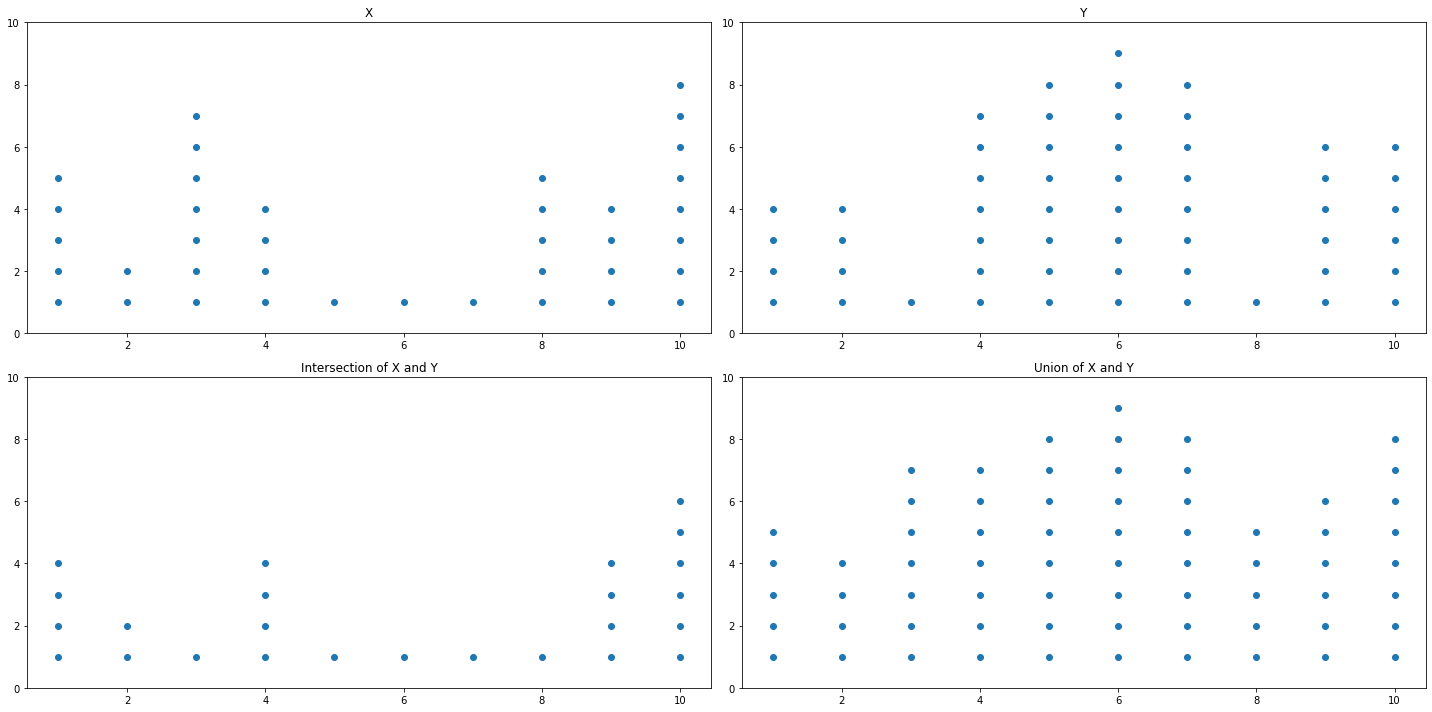

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.scatter(list(x[0] for x in X), list(x[1] for x in X))
plt.ylim(0,10)
plt.title('X')

plt.subplot(222)
plt.scatter(list(y[0] for y in Y), list(y[1] for y in Y))
plt.ylim(0,10)
plt.title('Y')

plt.subplot(223)
plt.scatter(list(xandy[0] for xandy in XandY), list(xandy[1] for xandy in XandY))
plt.ylim(0,10)
plt.title('Intersection of X and Y')

plt.subplot(224)
plt.scatter(list(xory[0] for xory in XorY), list(xory[1] for xory in XorY))
plt.ylim(0,10)
plt.title('Union of X and Y')

plt.tight_layout()
plt.show()